In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt


In [29]:
class TrickClassifier:
    def __init__(self, data_path, random_state=42):
        self.data = pd.read_csv(data_path)
        self.X_train, self.X_valid, self.y_train, self.y_valid = None, None, None, None
        self.random_state = random_state
    
    def split_data(self, train_size=0.7):
        np.random.seed(self.random_state)  # Set seed for reproducibility
        categories = self.data['trick_name'].unique()
        train_data = []
        test_data = []

        for category in categories:
            category_data = self.data[self.data['trick_name'] == category]
            category_data = category_data.sample(frac=1, random_state=self.random_state).reset_index(drop=True)

            train_samples = round(train_size * len(category_data))
            train_category = category_data.iloc[:train_samples]
            test_category = category_data.iloc[train_samples:]

            train_data.append(train_category)
            test_data.append(test_category)

        self.X_train = pd.concat(train_data, ignore_index=True).iloc[:, 1:]
        self.X_valid = pd.concat(test_data, ignore_index=True).iloc[:, 1:]
        self.y_train = pd.concat(train_data, ignore_index=True).iloc[:, 0]
        self.y_valid = pd.concat(test_data, ignore_index=True).iloc[:, 0]

    def train_model(self, model, model_name):
        model.fit(self.X_train, self.y_train)
        train_score = model.score(self.X_train, self.y_train)
        valid_score = model.score(self.X_valid, self.y_valid)
        
        # Access feature importances from the trained model
        if isinstance(model, RandomForestClassifier):
            feature_importances = model.feature_importances_
            importance_df = pd.DataFrame({'Feature': self.X_train.columns, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)
            
            # Plotting feature importances
            plt.figure(figsize=(20, 20))
            plt.barh(importance_df['Feature'], importance_df['Importance'])
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.title('Feature Importances (Random Forest)')
            plt.savefig("Feature_Importances.jpg")

        return train_score, valid_score, model_name
        

Model: Gaussian Naive Bayes, Train Score: 0.99, Valid Score: 0.99
Model: K Nearest Neighbors, Train Score: 0.98, Valid Score: 1.0
Model: Random Forest, Train Score: 0.99, Valid Score: 1.0
Model: Gradient Boosting, Train Score: 1.0, Valid Score: 0.98


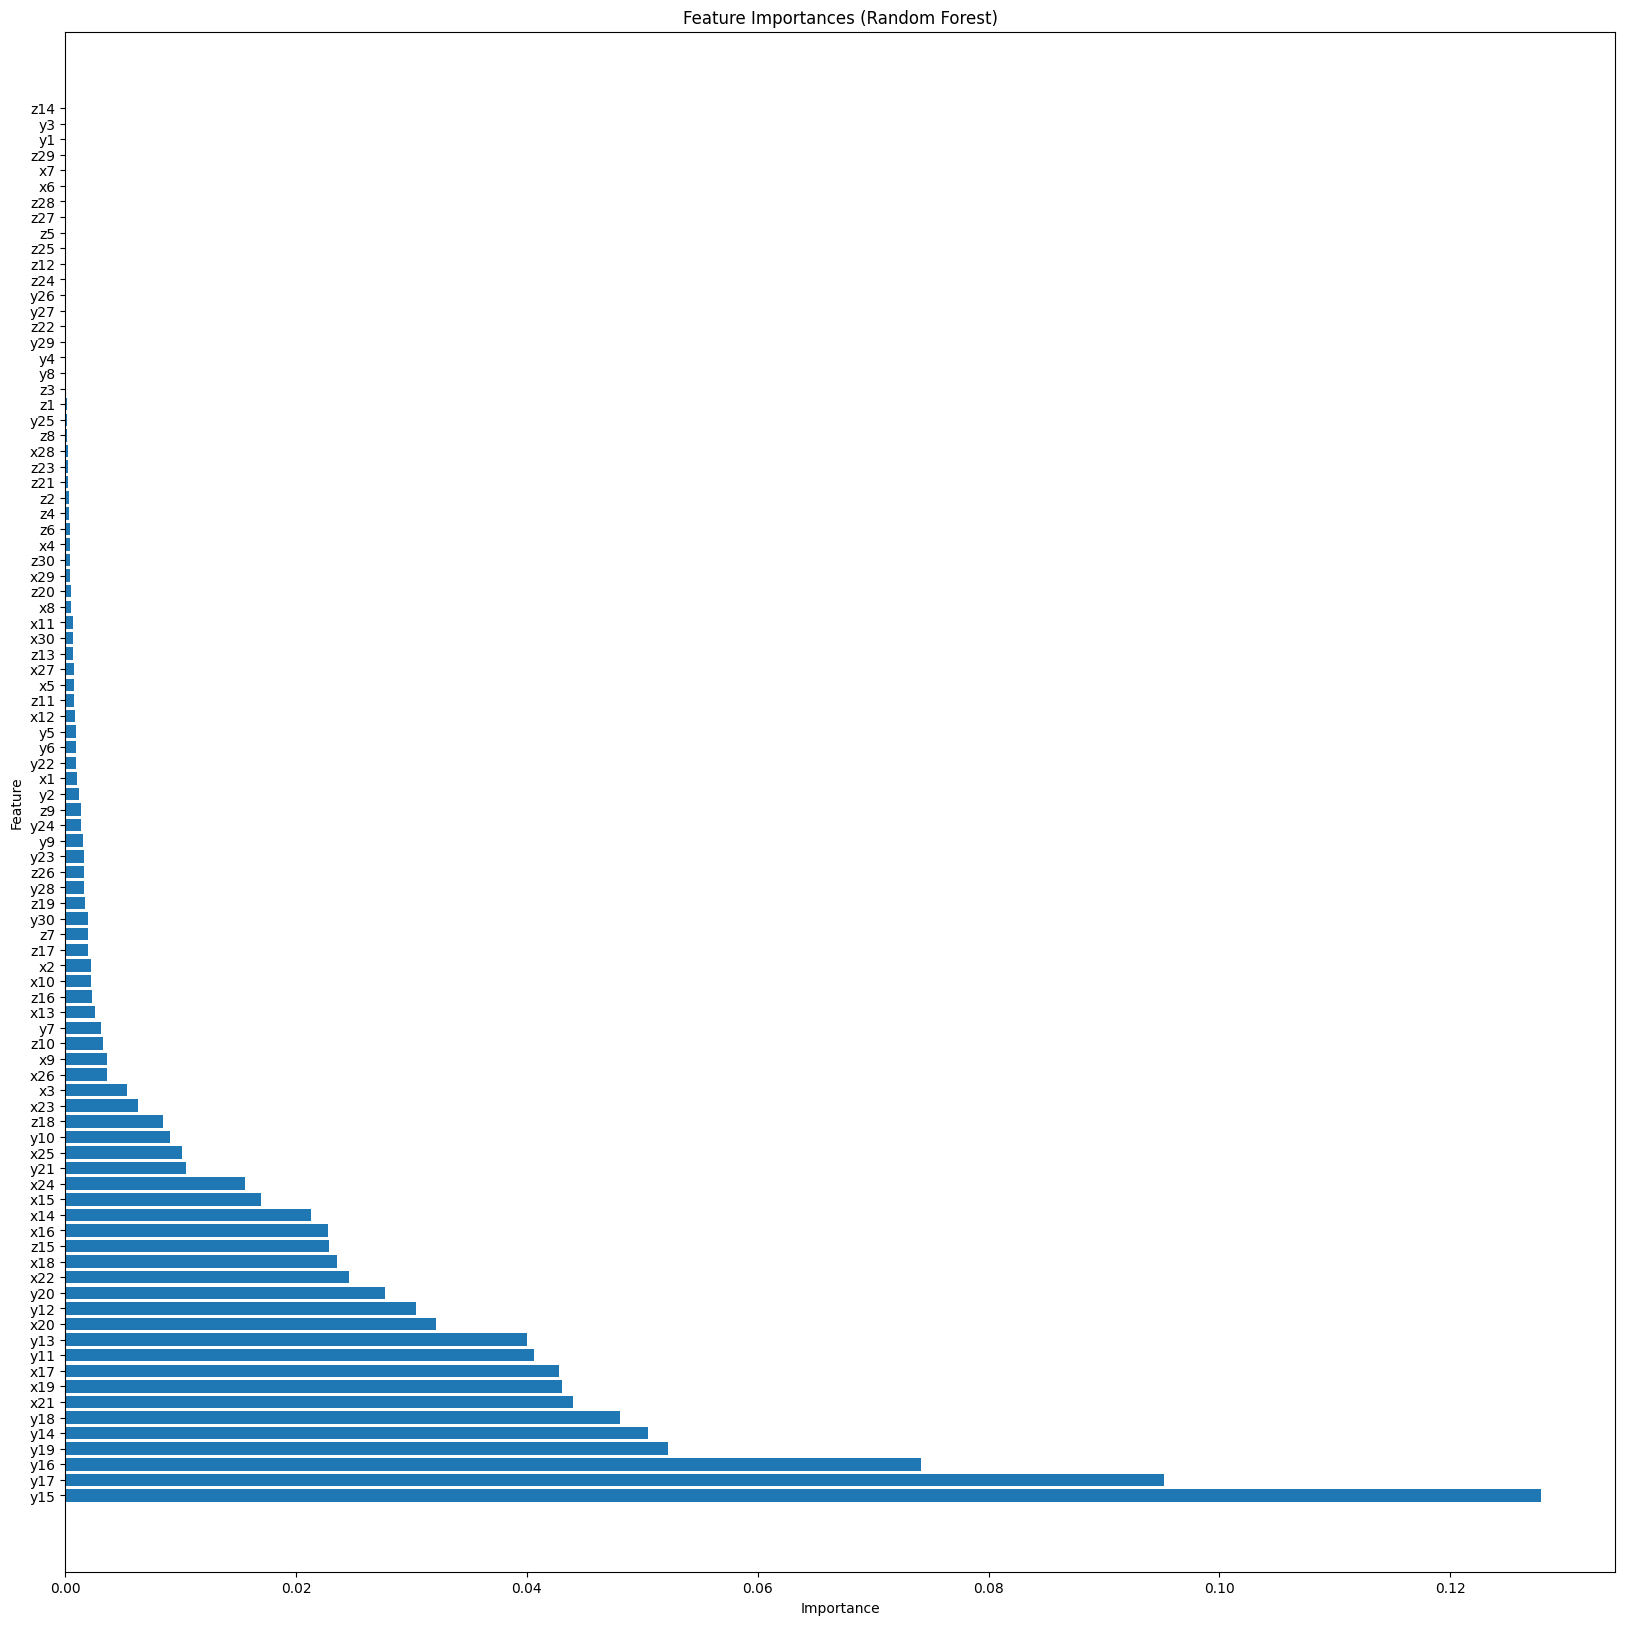

In [30]:
if __name__ == "__main__":
    data_file = 'features_data.csv'
    current_dir = os.path.dirname(os.path.abspath('Analysis.ipynb'))
    file_path = os.path.join(current_dir, data_file)
    #classifier = TrickClassifier('/Users/ishaan/Desktop/353_Project/features_data.csv', random_state=42)
    classifier = TrickClassifier(file_path, random_state=42)
    classifier.split_data()

    nb_model = GaussianNB()
    knn_model = KNeighborsClassifier(n_neighbors=5)
    #rf_model = RandomForestClassifier(n_estimators=120, max_depth=10, min_samples_leaf=2)
    rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=1)
    #gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=2, min_samples_leaf=0.1)
    gb_model = GradientBoostingClassifier(n_estimators=25, max_depth=5, min_samples_leaf=3)
    
    models = [(nb_model, 'Gaussian Naive Bayes'), 
              (knn_model, 'K Nearest Neighbors'), 
              (rf_model, 'Random Forest'), 
              (gb_model, 'Gradient Boosting')]

    for model, name in models:
        train_score, valid_score, model_name = classifier.train_model(model, name)
        print(f"Model: {model_name}, Train Score: {round(train_score,2)}, Valid Score: {round(valid_score,2)}")

In [31]:
'''###**** Code for tuning parameters ****

if __name__ == "__main__":
    classifier = TrickClassifier('/Users/ishaan/Desktop/353_Project/features_data.csv', random_state=42)
    classifier.split_data()

    # Existing models
    nb_model = GaussianNB()
    knn_model = KNeighborsClassifier(n_neighbors=5)
    rf_model = RandomForestClassifier()
    gb_model = GradientBoostingClassifier()

    models = [
        (nb_model, 'Gaussian Naive Bayes'), 
        (knn_model, 'K Nearest Neighbors'), 
        (rf_model, 'Random Forest'), 
        (gb_model, 'Gradient Boosting')
    ]

    for model, name in models:
        train_score, valid_score, model_name = classifier.train_model(model, name)
        print(f"Model: {model_name}, Train Score: {round(train_score,2)}, Valid Score: {round(valid_score,2)}")
    
    print("************************************")

    # Hyperparameter tuning using Grid Search for RandomForestClassifier
    param_grid_rf = {
        'n_estimators': [5, 25, 50, 75, 100, 125, 150],
        'max_depth': [2, 5, 7, 10, 12, 15],
        'min_samples_leaf': [1,2,3,4,5]
    }

    grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
    grid_search_rf.fit(classifier.X_train, classifier.y_train)

    print("Random Forest Best Parameters:", grid_search_rf.best_params_)
    print("Random Forest Best Score:", round(grid_search_rf.best_score_,2)
)'''


'###**** Code for tuning parameters ****\n\nif __name__ == "__main__":\n    classifier = TrickClassifier(\'/Users/ishaan/Desktop/353_Project/features_data.csv\', random_state=42)\n    classifier.split_data()\n\n    # Existing models\n    nb_model = GaussianNB()\n    knn_model = KNeighborsClassifier(n_neighbors=5)\n    rf_model = RandomForestClassifier()\n    gb_model = GradientBoostingClassifier()\n\n    models = [\n        (nb_model, \'Gaussian Naive Bayes\'), \n        (knn_model, \'K Nearest Neighbors\'), \n        (rf_model, \'Random Forest\'), \n        (gb_model, \'Gradient Boosting\')\n    ]\n\n    for model, name in models:\n        train_score, valid_score, model_name = classifier.train_model(model, name)\n        print(f"Model: {model_name}, Train Score: {round(train_score,2)}, Valid Score: {round(valid_score,2)}")\n    \n    print("************************************")\n\n    # Hyperparameter tuning using Grid Search for RandomForestClassifier\n    param_grid_rf = {\n      